In [ ]:
from six.moves import cPickle as pickle
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/My Drive/Colab Notebooks/HEX New folder'

In [ ]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline



# normalize inputs from 0-255 to 0-1
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def ReshapeY(Y_train,n):
    Y = list()
    for x in Y_train:
        Y.append(find_1(x, n))

    Y = np.array(Y)
    return Y
    print(Y.shape)
    
    
# look for 1 ( spoof) in each   
def find_1(x, n):
    if 1 in x:
        res = 1
    else: 
        res = 0
    return res    




    
def LOAD_data(path ):
    filenames = glob.glob(path + "/*.csv")

    dfs = []
    for filename in filenames:
        df=pd.read_csv(filename)
        if 'le0.csv'== filename[-7:]:
            df['attack'] = 0
            df = df[190:]

        else:
            df['attack'] = 1
        dfa = df['attack']
        df = df[14:]
        df = df.iloc[:-180]
        df = df.select_dtypes(exclude=['object','bool'])         #remove nan
        df = df.loc[:, (df != 0).any(axis=0)]                    #remove zeros
        df = df.drop(df.std()[(df.std() == 0)].index, axis=1)   #remove equals
        df=((df-df.min())/(df.max()-df.min()))*1

        df['attack'] = dfa
        dfs.append(df)


    # Concatenate all data into one DataFrame
    df = pd.concat(dfs, ignore_index=True)
        #df.head()
        
    
    # Concatenate all data into one DataFrame
    df = pd.concat(dfs, ignore_index=True)
    #df.head()

    df = df.select_dtypes(exclude=['object','bool'])         #remove nan
    df = df.loc[:, (df != 0).any(axis=0)]                    #remove zeros
    df = df.drop(df.std()[(df.std() == 0)].index, axis=1)   #remove equals

    sf = df[['roll', 'pitch', 'heading', 'rollRate', 'pitchRate', 'yawRate',
       'groundSpeed',  'altitudeRelative', 
       'throttlePct', 'estimatorStatus.horizPosRatio',
       'estimatorStatus.vertPosRatio',
       'estimatorStatus.horizPosAccuracy','gps.courseOverGround']]
    scaled_data = scale(sf)
    

    pca = PCA(n_components = 9)
    pca.fit(scaled_data)
    pca_data = pca.transform(scaled_data)

    pca_data = pd.DataFrame(pca_data)

    df_sf = pd.concat([pca_data, df[['attack']]], axis=1)

    sf_t =df_sf

    data_dim = sf_t.shape[1] -1
    timesteps = 60
    num_classes = 2


    X = sf_t.drop(['attack'], axis =1).values
    Y = sf_t[['attack']].values


    ll = sf_t.shape[0] // timesteps
    ll

    x = np.array(X[0: (timesteps*ll)])
    y = np.array(Y[0: (timesteps*ll)])
    x.shape

    X_t = np.reshape(x,(-1,timesteps,data_dim))
    Y_t = np.reshape(y,(-1,timesteps,1))


    Y_t = ReshapeY(Y_t,timesteps )
    print(X_t.shape)
    print(Y_t.shape)

    # lb_make = LabelEncoder()
    # Y_t = lb_make.fit_transform(Y_t)
    # Y_t = tf.keras.utils.to_categorical(Y_t)
    # X_t = X_t.astype("float32")
    # Y_t = Y_t.astype("float32")
    # X_t /= 255
    
    return (X_t,Y_t)


def put_together(combined_array, asd):
    combined_array = np.concatenate((combined_array, asd), axis=0)
    #combined_array = np.delete(combined_array, 0, axis=0)
    return combined_array


def Delete_first(combined_array):
    combined_array = np.delete(combined_array, 0, axis=0)
    return combined_array

In [ ]:
import os
 
paths = []    
# rootdir = r'C:\Users\lenovo\OneDrive - aggies.ncat.edu\Desktop\new correct files\HEX New folder'
for file in os.listdir(data_dir):
    d = os.path.join(data_dir, file)
    if os.path.isdir(d):
        paths.append(d)




In [ ]:
paths

['/content/drive/My Drive/Colab Notebooks/HEX New folder/ST NPLANE New folder',
 '/content/drive/My Drive/Colab Notebooks/HEX New folder/QUAD New folder',
 '/content/drive/My Drive/Colab Notebooks/HEX New folder/TAIL VTOL New folder',
 '/content/drive/My Drive/Colab Notebooks/HEX New folder/h480']

In [ ]:
from sklearn.preprocessing import scale

i = 0
for path in paths:
    (Xa,Ya) = LOAD_data(path)
    if  (i == 0):
        X_ = Xa  
        Y_ = Ya
        i = i + 1 
    else:
        X_ = np.concatenate((X_, Xa), axis=0)
        Y_ = np.concatenate((Y_, Ya), axis=0)

(461, 60, 9)
(461,)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(2325, 60, 9)
(2325,)
(455, 60, 9)
(455,)
(603, 60, 9)
(603,)


In [ ]:
print(X_.shape)
print(Y_.shape)

(3844, 60, 9)
(3844,)


In [ ]:
X_train_D,X_test_D, Y_train_D, Y_test_D = train_test_split(X_, Y_, test_size=0.10, random_state=1)

In [ ]:
print(Y_test_D.shape, ':y test')
print(Y_train_D.shape, ':y train')

(846,) :y test
(2998,) :y train


In [ ]:
def ReshapeY(Y_train,n):
    Y = list()
    for x in Y_train:
        Y.append(find_1(x, n))

    Y = np.array(Y)
    return Y
    print(Y.shape)
    
    
# look for 1 ( spoof) in each   
def find_1(x, n):
    if 1 in x:
        res = 1
    else: 
        res = 0
    return res

In [ ]:
# normalize inputs from 0-255 to 0-1
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# one-hot encode the labels
num_classes = 2
Y_train_D_hot = tf.keras.utils.to_categorical(Y_train_D-1, num_classes)
Y_test_D_hot = tf.keras.utils.to_categorical(Y_test_D-1, num_classes)

# # break training set into training and validation sets
# (X_train, X_valid) = X_train_D[300:], X_train_D[:300]
# (Y_train, Y_valid) = Y_train_D_hot[300:], Y_train_D_hot[:300]
X_train,X_valid, Y_train, Y_valid = train_test_split(X_train_D, Y_train_D_hot, test_size=0.1, random_state=1)

# X_train = X_train_D
# Y_train = Y_train_D_hot
X_test = X_test_D
Y_test = Y_test_D_hot

In [ ]:
Y_valid.shape

(346, 2)

In [ ]:
# X_train = np.transpose(X_train, (1, 0, 2))
# X_test = np.transpose(X_test, (1, 0, 2))
# X_valid = np.transpose(X_valid, (1, 0, 2))

# Y_train = np.transpose(Y_train, (1, 0, 2))
# Y_test = np.transpose(Y_test, (1, 0, 2))
# Y_valid = np.transpose(Y_valid, (1, 0, 2))

In [ ]:
X_train.shape

(3113, 60, 9)

In [ ]:
CNNch = 9

# epch
ne = 100

modelC2 = Sequential()
#1
modelC2.add(Conv1D(filters=16, kernel_size=64,strides = 16, padding='same', activation='relu', 
                        input_shape=(60, CNNch)))
modelC2.add(MaxPooling1D(pool_size=1))
#2
modelC2.add(Conv1D(filters=16, kernel_size=3, strides = 1, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=1))
#3
modelC2.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=1))
modelC2.add(Dropout(0.2))
#4
modelC2.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
modelC2.add(MaxPooling1D(pool_size=1))
modelC2.add(Dropout(0.2))
#5
modelC2.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
#paper no padding?, Yes, to make 5th layer output 6 width and 3 after pooling
#-> same seems to perform little better because of more parameter? 
# little diffrernt from the paper but keep it as padding = 'same'
modelC2.add(MaxPooling1D(pool_size=1))  

modelC2.add(Flatten())
modelC2.add(Dense(10, activation='relu'))
modelC2.add(Dropout(0.2))
modelC2.add(Dense(2, activation='softmax'))

modelC2.summary()


# compile the model
modelC2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='CNNC2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = modelC2.fit(X_train[:,:,0:CNNch], Y_train, batch_size=32, epochs=ne,
          validation_data=(X_valid[:,:,0:CNNch], Y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
modelC2.load_weights('CNNC2.weights.best.hdf5')

# evaluate and print test accuracy
score = modelC2.evaluate(X_test[:,:,0:CNNch], Y_test, verbose=0)
print('\n', 'CNN Test accuracy:', score[1])

score = modelC2.evaluate(X_train[:,:,0:CNNch], Y_train, verbose=0)
print('\n', 'CNN train accuracy:', score[1])

score = modelC2.evaluate(X_valid[:,:,0:CNNch], Y_valid, verbose=0)
print('\n', 'CNN validation accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 16)             9232      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 16)             784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 32)             1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 32)            

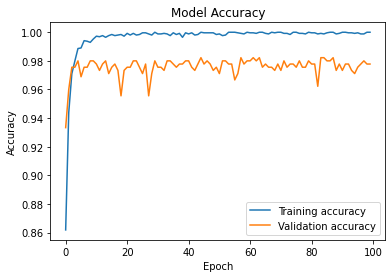

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
 y_pred = modelC2.predict(X_test)

In [ ]:
 y_pred.round()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       603
           1       0.95      0.95      0.95       243

   micro avg       0.97      0.97      0.97       846
   macro avg       0.97      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846
 samples avg       0.97      0.97      0.97       846

Confusion matrix, without normalization
[[231  12]
 [ 11 592]]


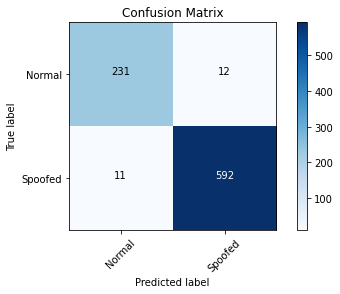

In [ ]:
ypreddf = pd.DataFrame(y_pred.round())
ytestdf = pd.DataFrame(Y_test)

from sklearn.metrics import classification_report, confusion_matrix
import itertools

print (classification_report(Y_test, y_pred.round()))


cm = confusion_matrix(ytestdf[0], ypreddf[0])
cm_plot_labels = ['Normal','Spoofed']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score,recall_score, precision_score

print("Avg F1-score: %.4f" % f1_score(Y_test, y_pred.round(), average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(Y_test, y_pred.round(), average='weighted'))
print("Recall score: %.4f" % recall_score(Y_test, y_pred.round(), average='weighted'))
print("Precision score: %.4f" % precision_score(Y_test, y_pred.round(), average='weighted'))

Avg F1-score: 0.9728
Jaccard score: 0.9473
Recall score: 0.9728
Precision score: 0.9728
